# Lab 6.02 - Regression analysis

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 2: Flemish agricultural and horticultural businesses

1. Use the dataset agriculture flanders.csv. The file contains data about agricultural and horticultural businesses in Flanders

    Source: Departement Landbouw en Visserij op basis van StatBel

In [2]:
farms = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/agriculture%20flanders.csv', delimiter = ";", decimal=',')
# Show the first few records of the Data Frame
farms.head()

,year,number_of_farms,average_area_per_farm_(ha)
0,1980,75706,8.38
1,1981,73292,8.58
2,1982,71255,8.79
3,1983,69807,8.94
4,1984,68083,9.15


2. What are the datatypes for each of the columns.

In [3]:
farms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        41 non-null     int64  
 1   number_of_farms             41 non-null     int64  
 2   average_area_per_farm_(ha)  41 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


3. Draw a scatter plot of the number of farms versus the year.


<Axes: xlabel='year', ylabel='number_of_farms'>

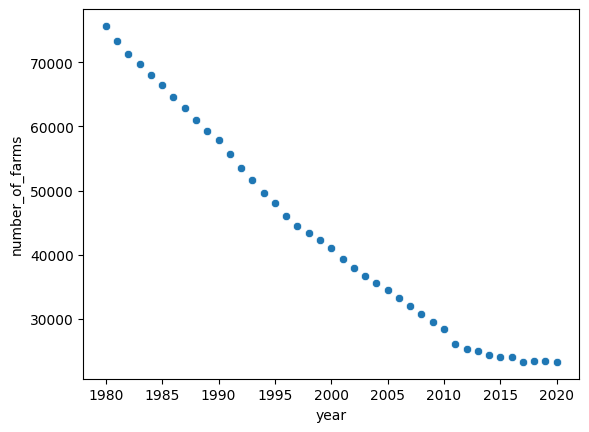

In [4]:
sns.scatterplot(data=farms,x='year',y='number_of_farms')


4. Is there a positive / negative relationship between year and number_of_farms?

    $R = -0.9861066349492859$

In [10]:
corr=np.corrcoef(farms.year,farms.number_of_farms)[0][1]

print(f"R ≈ {corr}")

R ≈ -0.9861066349492859


6. Is there a strong relationship between year and 'number_of_farms'?

    $R^2 = 0.9724062954910041$

In [9]:
R2 = corr**2
print(f"R² ≈ {R2}")

R² ≈ 0.9724062954910041


7. Draw a scatter plot of the 'average_area_per_farm_(ha)' versus the year.

<Axes: xlabel='year', ylabel='average_area_per_farm_(ha)'>

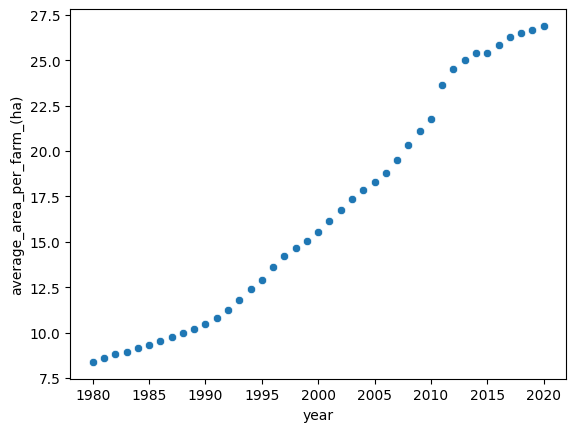

In [12]:
sns.scatterplot(data=farms,x='year',y='average_area_per_farm_(ha)')


8. What will be the 'average_area_per_farm_(ha)' in 2035?

Average area in 2035 = 34.91987804878045

In [19]:
farms_x = farms.year.values.reshape(-1,1)
farms_y = farms['average_area_per_farm_(ha)']

model = LinearRegression().fit(farms_x, farms_y)
print(f"Regression line y = {model.intercept_:.4f} + {model.coef_[0]:.4f} x")

Regression line y = -1031.8952 + 0.5242 x


In [20]:
model.predict([[2035]])[0]

34.91987804878045

8. Calculate the total agricultural area for each year.   
Calculate for each year the change of the total area relative to 1980.  
Make a plot.

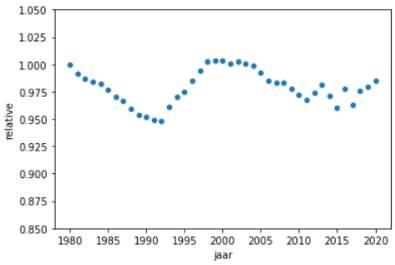


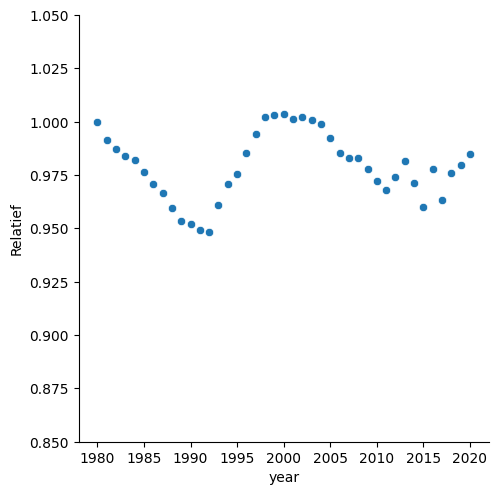

In [27]:
farms['Totaal'] = farms['number_of_farms'] * farms['average_area_per_farm_(ha)']
farms.head()

area_1980 = farms[farms.year == 1980]['Totaal'][0]
farms['Relatief'] = farms['Totaal'] / area_1980
farms.head()

p =sns.relplot(data=farms,x='year',y='Relatief')
p.set(ylim=(0.850,1.05))